<hr>

#### <strong>第一次作品：探索機率分配、隨機樣本與抽樣分配的樣貌</strong>

學號：411278015

姓名：王欣霖

<hr>

 **<font color=darkgoldenrod>作品目標</font>**：

1. 繪製下列連續型分配的 PDF 函數：
    - Normal、T、Chi-square、Exponential、Beta、Gamma、F。利用改變分配函數的參數，觀察其分配函數的「樣貌」；畫出所有可能的「形狀」並說明（或標示）與參數間的關係。
    - 將不同參數的 PDF 函數畫在同一張圖，或選擇切割畫面（subplot）以應付不同參數的表現。
    - 也可以加入離散型分配的 PMF 函數（例如 Binomial、Poisson、Geometric、Negative Binomial 等）。
1. 繪製隨機樣本：從前述的每個分配中（各挑一組參數）產生 N 個隨機樣本
    - 繪製直方圖（Histogram）、盒鬚圖（Boxplot）、常態機率圖（Normal Probability plot）、經驗累積機率函數（Empirical CDF）。將四張圖繪製在 2x2 的子圖上。
    - 樣本數 $n$ 自訂，建議選擇不同大小的 $n$ 以展現樣本數對圖形產生的影響。
  
1. (optional) 製作三個抽樣分配（Sampling Distribution）的相關圖形：
    - 例如 $Y = X^2, X \sim N(0,1)$，畫出 $Y$ 的直方圖、盒鬚圖、propability plot 、Empirical CDF。
    - 其他兩個抽樣分配可參考課本或講義內容，譬如 
        - $Y = X_1 + X_2$，其中 $X_1 \sim \chi^2(2), X_2 \sim \chi^2(4)$；
        - $F = \frac{U/r_1}{V/r_2}$，其中 $U \sim \chi^2(r_1), V\sim \chi^2(r_2)$；
        - $T = \frac{Z}{\sqrt{U/r}}=\frac{\overline{x}-{\mu}}{s/\sqrt{n}} \sim t(n-1)$，其中 $Z \sim N(0,1), U \sim \chi^2(r)$
    - 也可以製作中央極限定理（Central Limit Theorem, CLT）的抽樣分配。


<hr>

**<font color=darkgoldenrod>預先載入套件與函數：</font>**

In [41]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%config InlineBackend.figure_format = 'retina'

**<font color=darkgoldenrod>1：繪製分配函數</font>**

1.1 常態分配（Normal Distributions）

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}},\; -\infty < x < \infty$$

繪製不同 $\mu$ 與 $\sigma$ 對常態分配 PDF 的變化
 - 固定 $\sigma = 1$，改變 $\mu = 1, 2, 3, 4, 5$
 - 固定 $\mu = 0$，改變 $\sigma = 1, 2, 3, 4, 5$

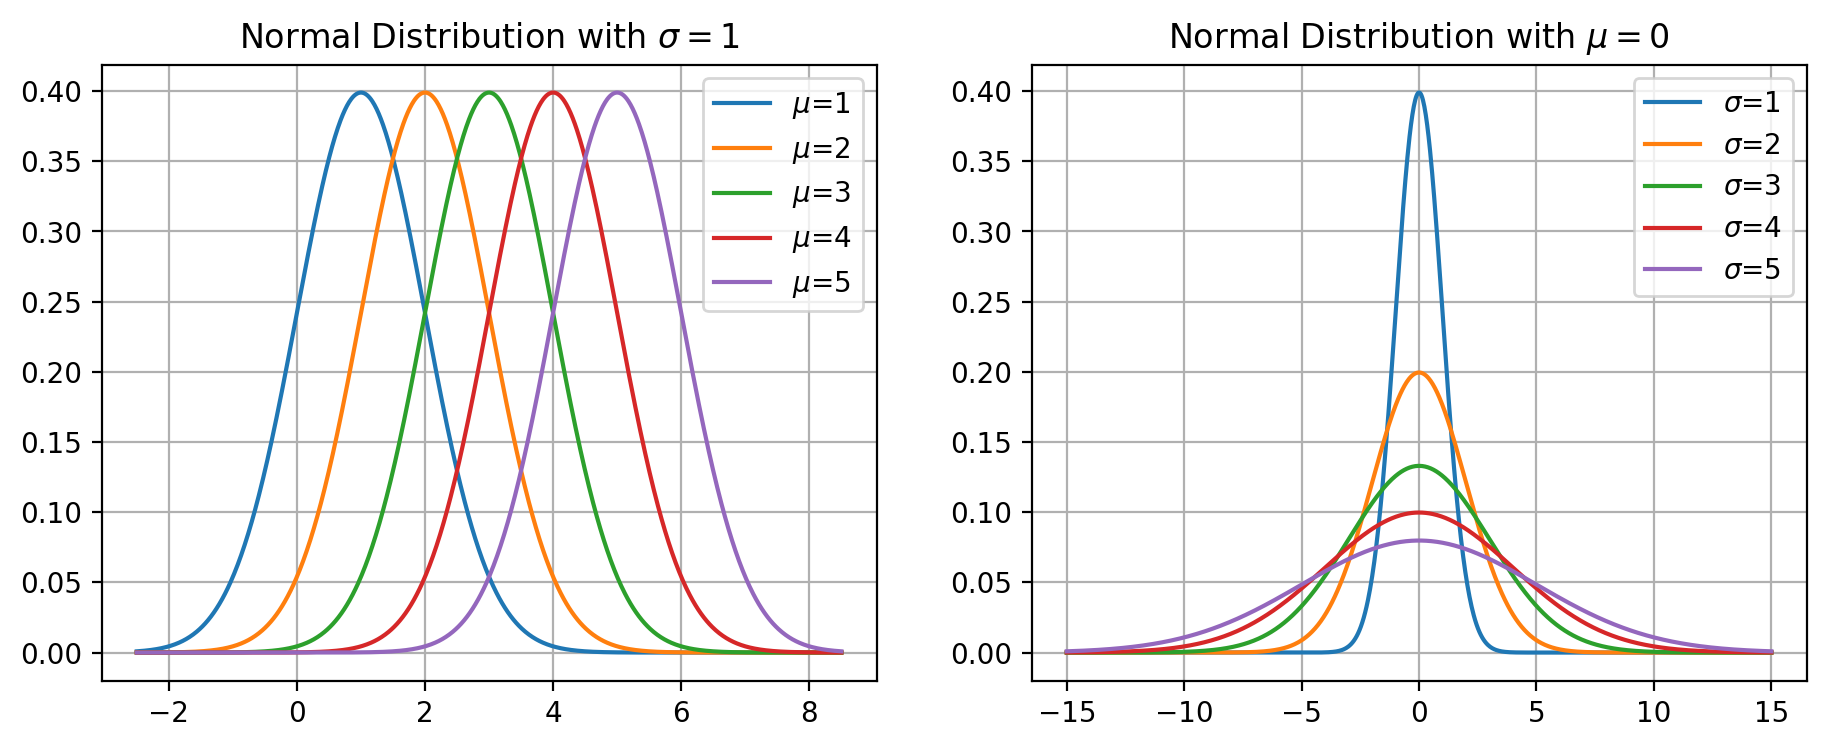

In [42]:
# 繪製常態分配
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))
xlim = [-2.5, 8.5]
sigma = 1
#x_left, x_right = -5, 15|
mu = np.arange(1, 6)
x = np.linspace(xlim[0], xlim[1], 1000)
Y = stats.norm.pdf(x.reshape(-1, 1), mu, sigma) # broadcasting
label = [r"$\mu$={}".format(i) for i in mu] # list comprehension
ax[0].plot(x, Y, label=label)
ax[0].legend()
ax[0].grid()
ax[0].set_title(r"Normal Distribution with $\sigma=${}".format(sigma))

xlim = [-15, 15] # 範圍配合 sigma 最大值
mu = 0
s = np.arange(1, 6)
x = np.linspace(xlim[0], xlim[1], 1000)
Y = stats.norm.pdf(x.reshape(-1, 1), mu, s)
label = [r"$\sigma$={}".format(i) for i in s]
ax[1].plot(x, Y, label=label)
ax[1].legend()
ax[1].grid()
ax[1].set_title(r"Normal Distribution with $\mu=${}".format(mu))
plt.show()

**<font color=skyblue>注意事項與討論：</font>**
- 考慮 x 值的範圍，才能完整呈現常態分配圖形該有的樣貌。
- 練習利用非迴圈的矩陣計算方式（Broadcasting 技術）繪圖。
- x.reshape(-1, 1) 轉換 x 向量的形式。
- label 部分選擇用 list comprehension 來加入標籤。

<hr>

1-2 t Distribution
$$
f(t) = \frac{\Gamma\!\left(\tfrac{\nu+1}{2}\right)}{\sqrt{\nu \pi}\,\Gamma\!\left(\tfrac{\nu}{2}\right)}
\left(1 + \frac{t^2}{\nu}\right)^{-\tfrac{\nu+1}{2}},\quad -\infty<t<\infty
$$



改變 T 分配的自由度： df = $1, 5, 10, 20, 30, 40, 60, 200$

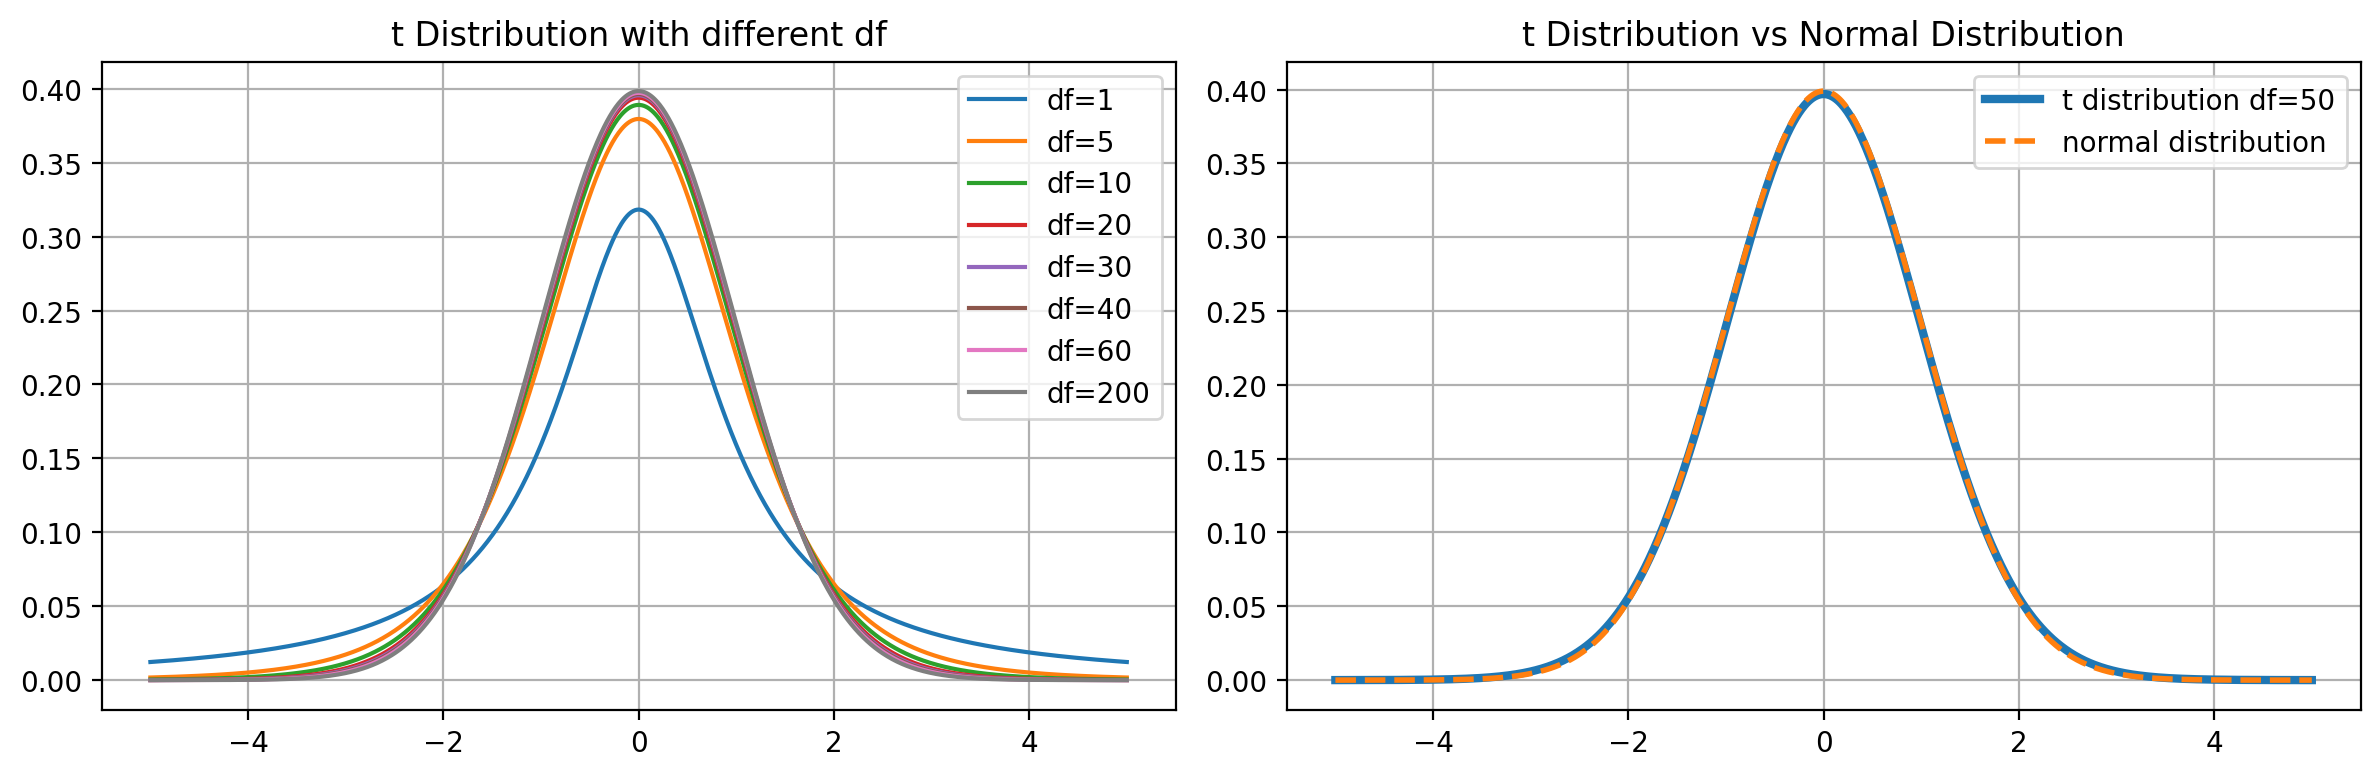

In [52]:
# 並排繪製 t 分配與 t vs Normal 分配
df = [1, 5, 10, 20, 30, 40, 60, 200]
x_left, x_right = -5, 5
n = 1000
x = np.linspace(x_left, x_right, n)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 左圖：不同 df 的 t 分配（逐條畫，確保標籤正確對應）
for d in df:
    ax[0].plot(x, stats.t.pdf(x, d), label=f"df={d}")
ax[0].legend()
ax[0].grid(True)
ax[0].set_title("t Distribution with different df")

# 右圖：t(df=50) vs Normal 分配（Normal 用虛線＋降透明度）
Y1 = stats.t.pdf(x, 50)       # t 分配
Y2 = stats.norm.pdf(x)        # 常態分配 (μ=0, σ=1)
ax[1].plot(x, Y1, label="t distribution df=50", linewidth=3.0)
ax[1].plot(x, Y2, linestyle='--', linewidth=2.0, alpha=1, label="normal distribution")  # ← 虛線＋透明
ax[1].legend()
ax[1].grid(True)
ax[1].set_title("t Distribution vs Normal Distribution")

plt.tight_layout()
plt.show()

**<font color=skyblue>注意事項與討論：</font>**
- 自由度 df 對 t 分配的影響：

- 當 df 很小（如 1），t 分配的尾部較厚（heavy tail），比常態分配更容易出現極端值。
  隨著 df 增加，t 分配逐漸趨近於標準常態分配（df → ∞ 時，t 分配即為常態分配）。
  圖中可明顯看到 df=1 時曲線最扁、尾巴最厚，df 越大曲線越尖、越接近常態分配。
  應用情境：

- t 分配常用於小樣本推論（如 t 檢定），當樣本數大時可直接用常態分配。
  繪圖技巧：

- 利用 broadcasting 與 x.reshape(-1, 1)，可一次計算多組參數，避免 for 迴圈，提升效率。
  標籤用 list comprehension 產生，方便維護。
  

- x 軸範圍要涵蓋所有分配的主要區域，否則尾部特性不明顯。
  畫多條線時，label 要清楚標示參數，方便比較。

<hr>

1-3 &chi;&sup2; Distribution

$$f(x) = \frac{1}{\Gamma(\frac{r}{2})2^{\frac{r}{2}}}x^{\frac{r}{2}-1}e^{-\frac{x}{2}},\; 0 < x < \infty\;\;;\;\; {\mu} = r\;\;;\;\; {\sigma^2} = 2r$$

繪製不同自由度 $r$，卡方分配的樣貌，自由度 $r$ 分別為 1, 2, 3, 4, 5, 7, 10, 15, 20, 30

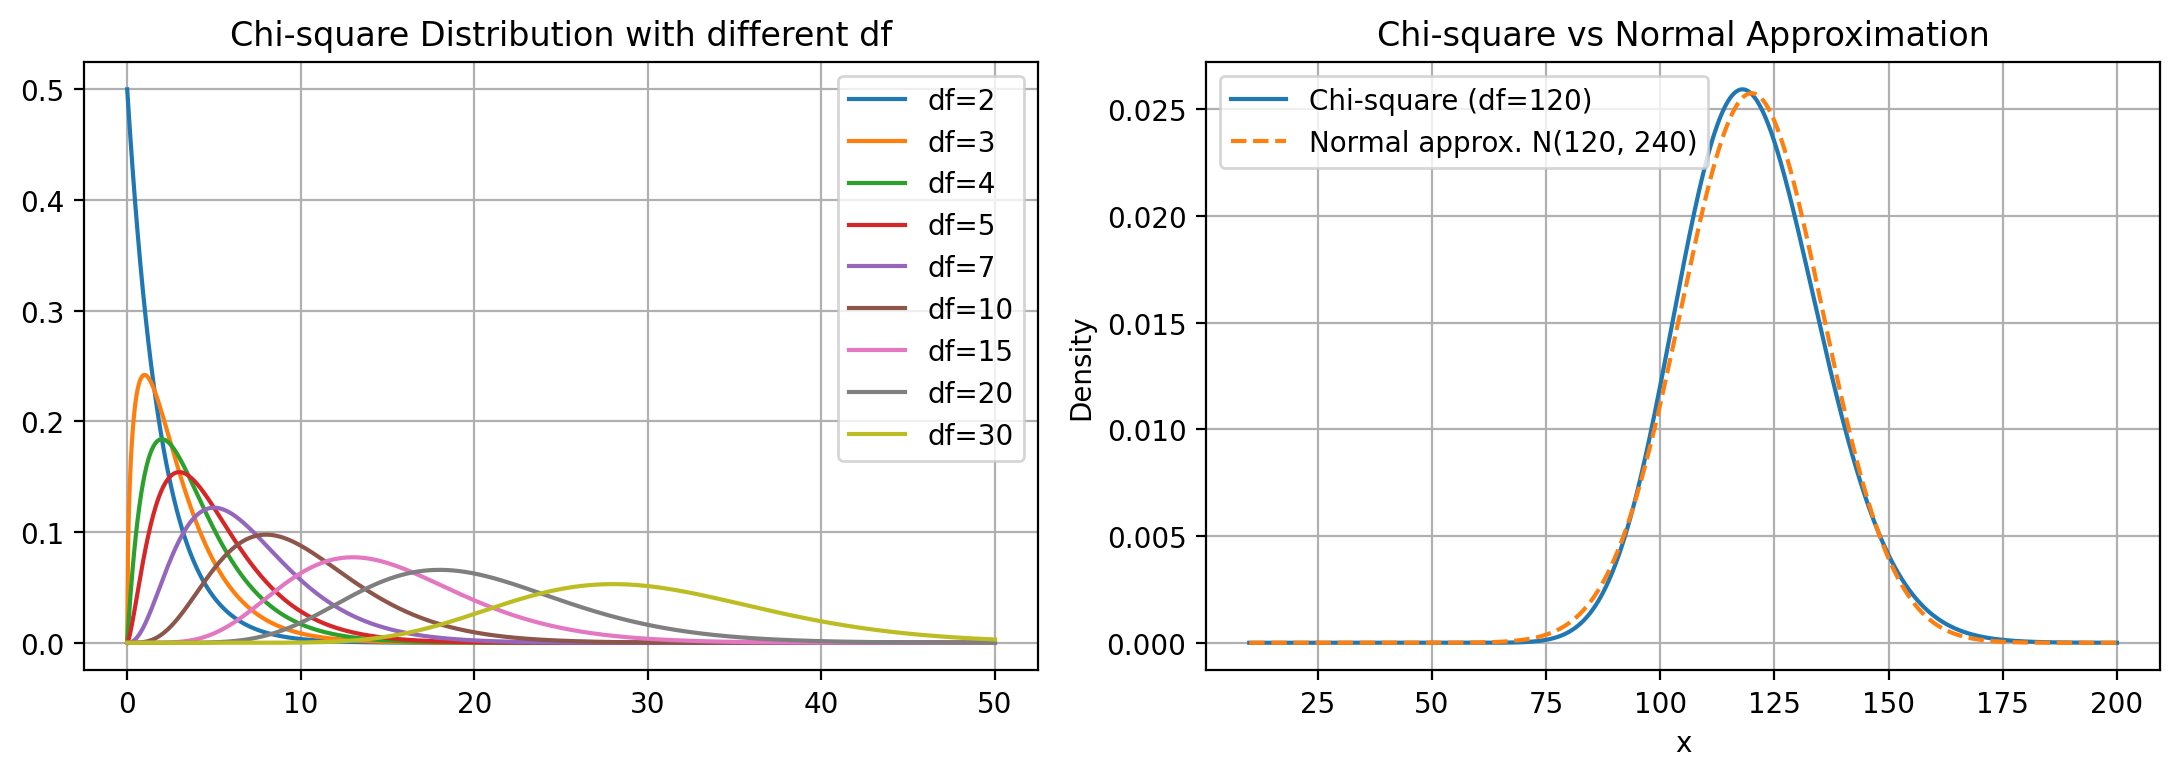

In [44]:
# 繪製 chi-square 分配 並取自由度分別為 2, 3, 4, 5, 7, 10, 15, 20, 30
# 第一張圖：不同自由度的卡方分配
df_list = [2, 3, 4, 5, 7, 10, 15, 20, 30]
x_left, x_right = 0, 50
n = 1000
x1 = np.linspace(x_left, x_right, n)
Y = stats.chi2.pdf(x1.reshape(-1, 1), df_list)
label = [f"df={i}" for i in df_list]

# 第二張圖：大自由度卡方分配與常態分配比較
df2 = 120
x2 = np.linspace(10, 200, 1000)
Y1 = stats.chi2.pdf(x2, df2)
mu = df2
sigma = np.sqrt(2 * df2)
Y2 = stats.norm.pdf(x2, mu, sigma)

# 建立並排子圖
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# 左圖
ax[0].plot(x1, Y, label=label)
ax[0].legend()
ax[0].grid()
ax[0].set_title("Chi-square Distribution with different df")

# 右圖
ax[1].plot(x2, Y1, label=f"Chi-square (df={df2})")
ax[1].plot(x2, Y2, label=f"Normal approx. N({mu}, {round(sigma**2)})", linestyle="--")
ax[1].legend()
ax[1].grid()
ax[1].set_title("Chi-square vs Normal Approximation")
ax[1].set_xlabel("x")
ax[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

**<font color=skyblue>注意事項與討論：</font>**
- **卡方分配屬於右偏分配（right-skewed distribution）**
  - 自由度 \( df \) 越小，偏態程度越明顯。
  - 這反映在密度函數高峰靠近 0，尾部延伸向右的長尾現象。

- **分配的定義域為：**
  $$
  X \in [0, \infty)
  $$
  因為卡方分配是標準常態變數平方和之總和，理論上不可能為負值。

- **自由度增加時，卡方分配趨近常態分配：**

  根據中央極限定理（Central Limit Theorem）：

  $$chi^2_{df} \xrightarrow{d} \mathcal{N}(df, 2df), \quad \text{當 } df \to \infty$$

- **機率密度函數的高峰（Mode）位置隨自由度右移：**
  $$
  {Mode} =
  \begin{cases}
  0, & \text{若 } df \leq 2 \\
  df - 2, & \text{若 } df > 2
  \end{cases}
  $$

- **自由度小時具有重尾（heavy-tailed）特性：**
  - 極端大值的機率不容忽視，可能影響統計檢定結果。

- **自由度越大，尾部收斂越快，分布趨向對稱、光滑。**

<hr>

1-4 Exponential Distribution
$$
f(x;\lambda) =
\begin{cases}
\lambda e^{-\lambda x}, & x \geq 0, \\
0, & x < 0.
\end{cases}
$$

改變$\lambda$，$\lambda$ 分別為 0.5, 1, 1.5, 2, 3

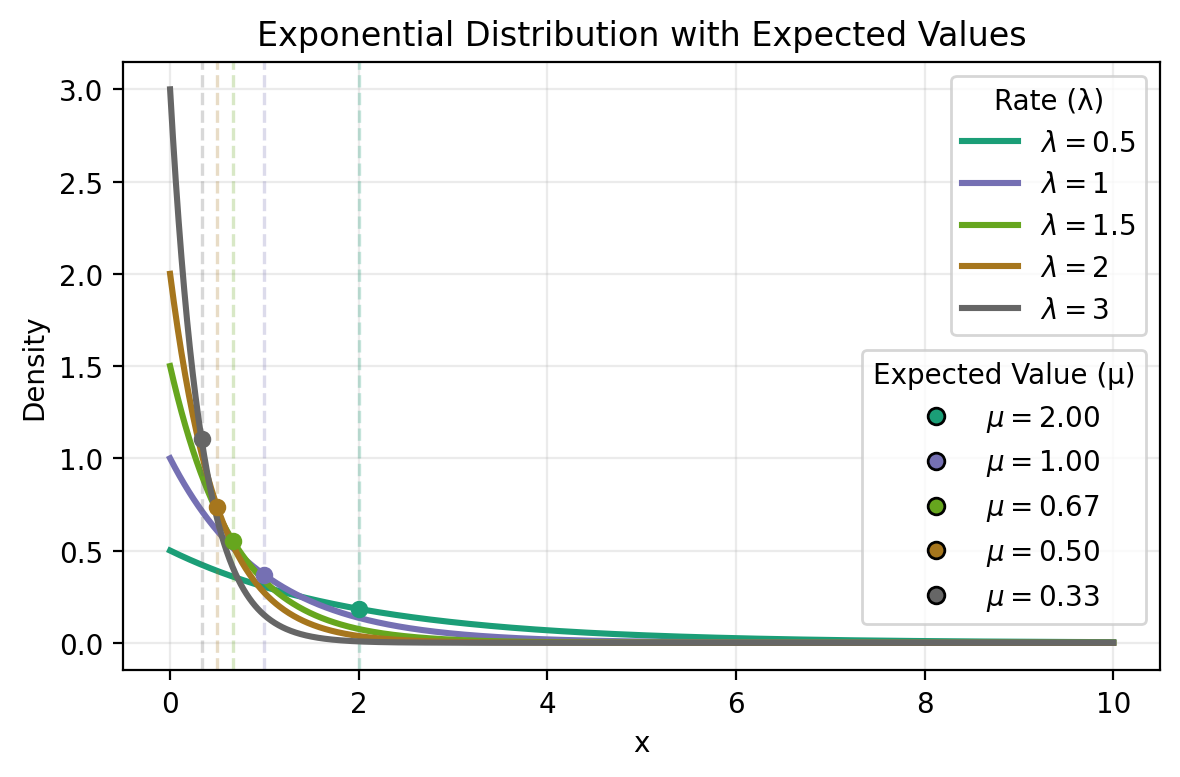

In [48]:
#繪製Exponential Distribution with different lambda
lambd = [0.5, 1, 1.5, 2, 3]
x = np.linspace(0, 10, 1000)

fig, ax = plt.subplots(figsize=(6, 4))
colors = plt.cm.Dark2(np.linspace(0, 1, len(lambd)))

line_handles, mean_handles = [], []

for c, lam in zip(colors, lambd):
    mu = 1 / lam
    y = stats.expon.pdf(x, scale=mu)

    # 主曲線 (λ)
    line, = ax.plot(x, y, color=c, linewidth=2.2, label=rf"$\lambda={lam}$")
    line_handles.append(line)

    # 均值點 + 輔助虛線
    ax.axvline(mu, color=c, linestyle='--', linewidth=1.2, alpha=0.25)
    ax.scatter(mu, stats.expon.pdf(mu, scale=mu), color=c, s=28, zorder=5)

    # μ 的 legend 只用點表示
    mean_handles.append(Line2D([0], [0], marker='o', color='none',
                               markerfacecolor=c, markersize=6,
                               label=rf"$\mu={mu:.2f}$"))

# 第一個 legend (λ)
leg1 = ax.legend(handles=line_handles, title="Rate (λ)",
                 loc="upper right", bbox_to_anchor=(1, 1), frameon=True)

# 第二個 legend (μ)，放在第一個 legend 下方
leg2 = ax.legend(handles=mean_handles, title="Expected Value (μ)",
                 loc="upper right", bbox_to_anchor=(1, 0.55), frameon=True)

# 把第一個 legend 放回畫布
ax.add_artist(leg1)

ax.set_title("Exponential Distribution with Expected Values")
ax.set_xlabel("x")
ax.set_ylabel("Density")
ax.grid(alpha=0.25)
fig.tight_layout()
plt.show()


**<font color=skyblue>注意事項與討論：</font>**
- **λ（lambda）為速率參數，μ（mu）為期望值（μ=1/λ）**，每條曲線的高峰與衰減速度都與 λ 有關。λ 越大，分布衰減越快、期望值越小。
- **均值點（μ）以顏色對應的圓點標示**，並用虛線輔助，讓每個分布的期望值位置一目了然。
- **圖例分為兩組**：一組標示 λ（主曲線），一組標示 μ（均值點），方便對照參數與分布形狀的關係。
- **顏色一致性**：每組 λ/μ 都用同一顏色，視覺辨識度高。
- **Exponential 分布僅定義於 x ≥ 0**，圖形左側不會有密度。
- **應用情境**：常用於描述等待時間、壽命等隨機事件的間隔。
- **繪圖技巧**：
    - 使用 `plt.cm.Dark2` 調色盤，讓多條線條顏色分明。
    - `Line2D` 自訂 legend 樣式，讓均值點圖例更直觀。
    - `axvline` 虛線僅作輔助，主視覺重點在 colored dot。
- **觀察**：λ 越大，分布越集中於 0 附近，μ 越小；λ 越小，分布拉得越長，μ 越大。

<hr>

**<font color=darkgoldenrod>2：繪製隨機亂數相關圖形</font>**

2-1. 從常態分配抽取隨機亂數並繪製直方圖（Histogram）、盒鬚圖（Boxplot）、常態機率圖（Q-Q plot）、經驗累積機率函數（ECDF）

- 樣本數 $n = 1000$
- 以副程式呈現（必要時）

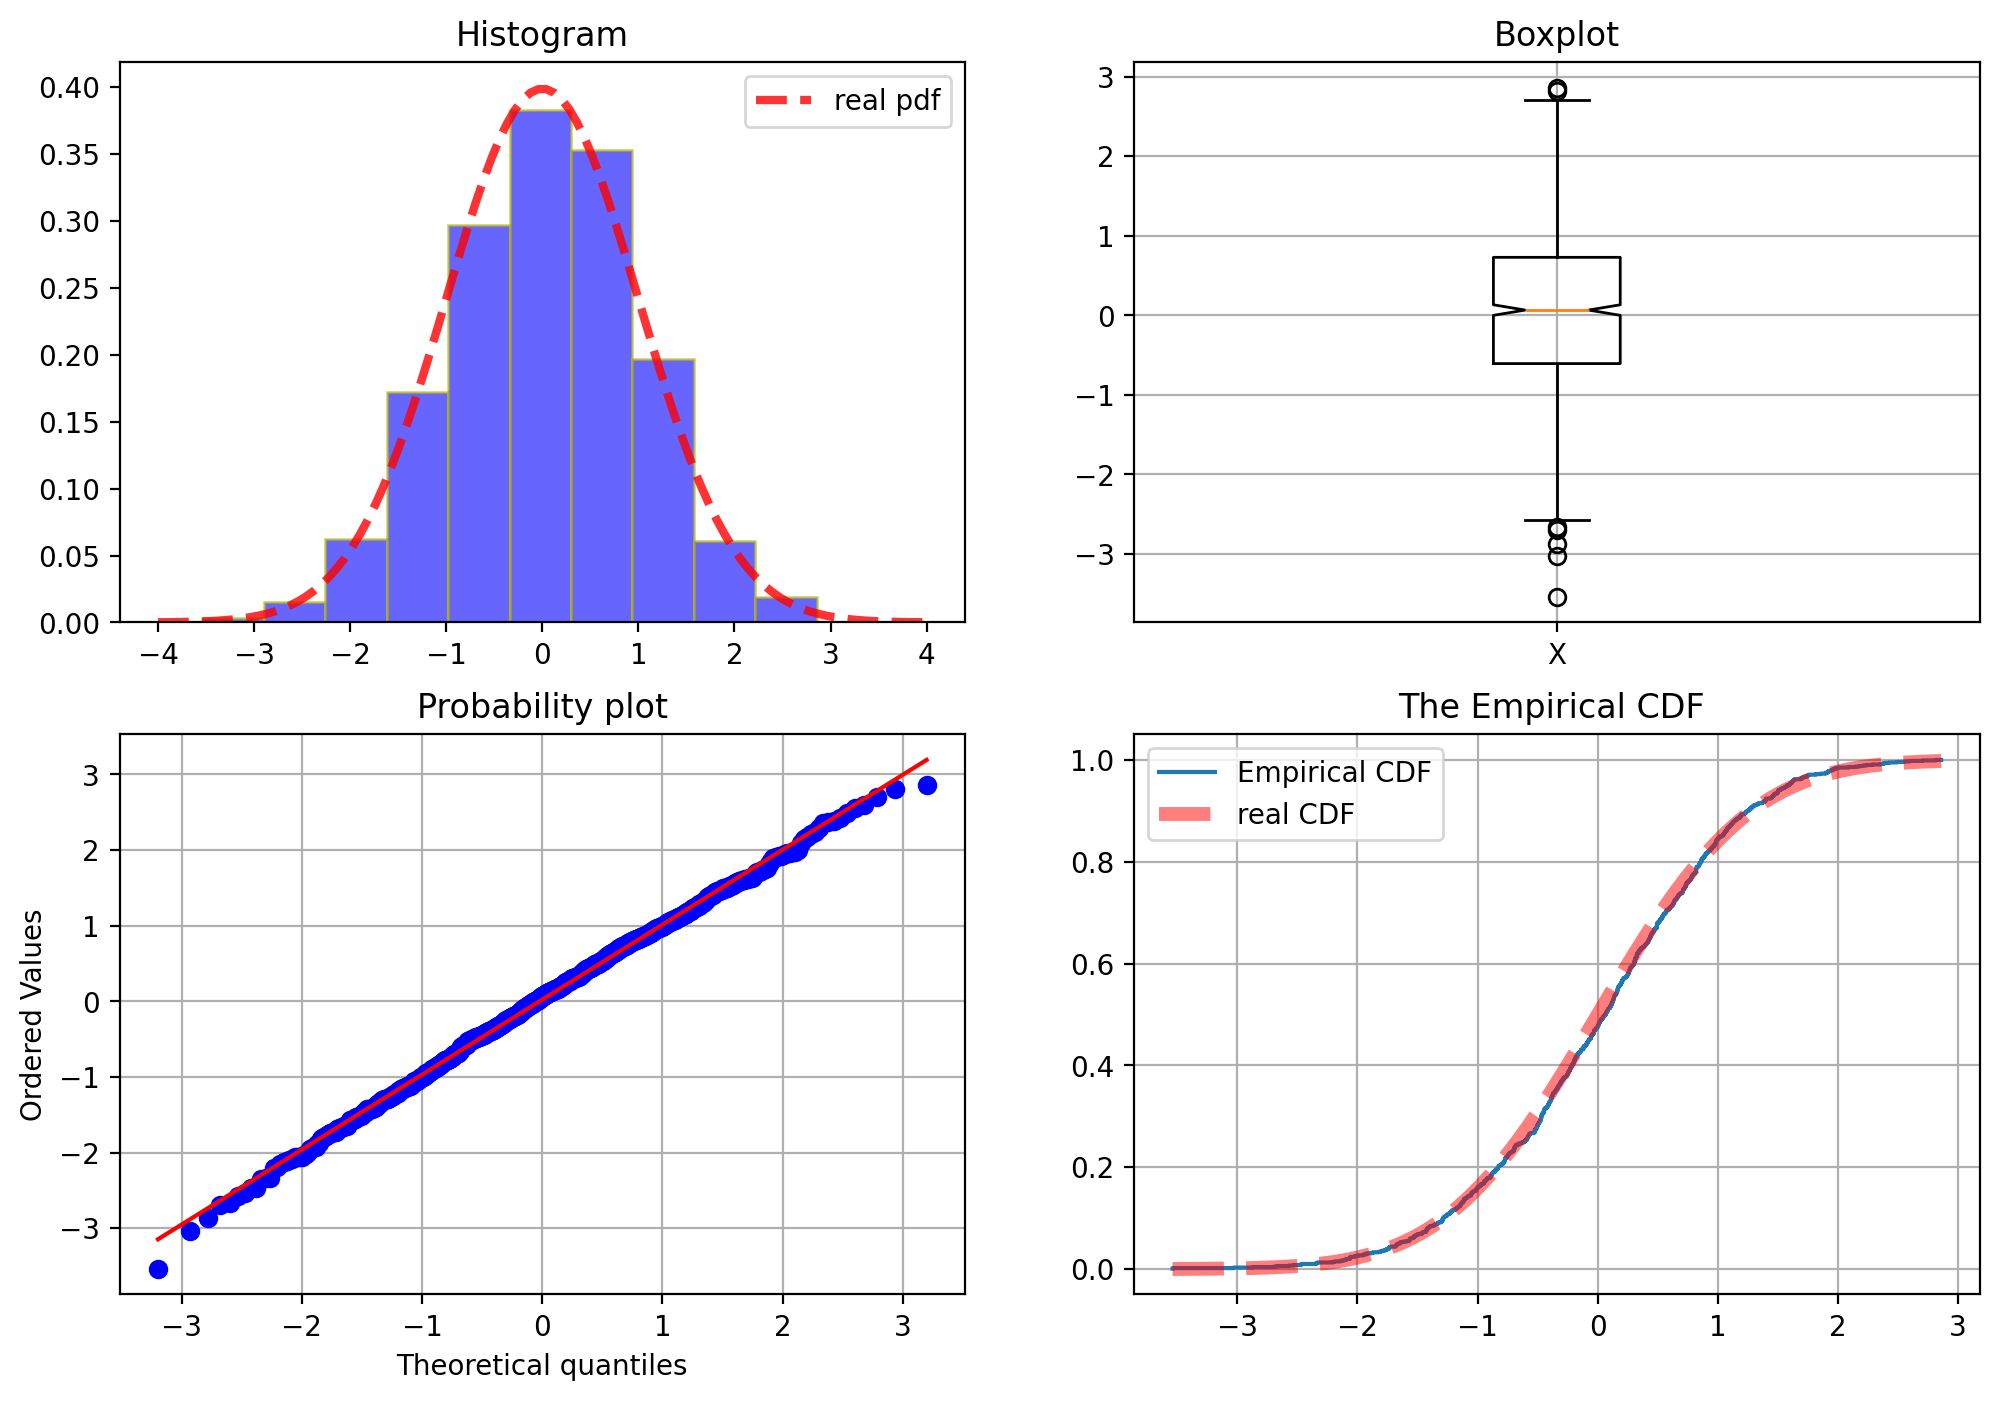

In [46]:
n = 1000
x = stats.norm.rvs(size = n)
fig, ax = plt.subplots(2, 2, figsize = (12, 8))
# 直方圖
ax[0,0].hist(x, bins = 10, density = True, alpha = 0.6,\
              color = 'b', edgecolor = 'y', linewidth = 1)
xx= np.linspace(-4, 4, 100)
yy = stats.norm.pdf(xx)
ax[0,0].plot(xx, yy, color = 'r', linestyle = '--', \
             linewidth = 3, alpha = 0.8, label = 'real pdf')
ax[0,0].legend()
ax[0,0].set_title('Histogram')
# 盒鬚圖
ax[0,1].boxplot(x, notch=True, vert=True, tick_labels=['X'])
ax[0,1].grid(True)
ax[0,1].set_title('Boxplot')
# 機率圖
stats.probplot(x, dist = "norm", plot = ax[1,0])
ax[1,0].grid(True)
ax[1,0].set_title('Probability plot')
# 經驗累積密度函數
x = np.sort(x)
Y = np.arange(1, n+1) / n
ax[1,1].plot(x, Y, drawstyle = 'steps-pre', label = 'Empirical CDF')
Y_ = stats.norm.cdf(x)
ax[1,1].plot(x, Y_, color = 'r', linestyle = '--',
    linewidth = 5, alpha = 0.5, label = 'real CDF')
ax[1,1].legend(), ax[1,1].grid(True)
ax[1,1].set_title('The Empirical CDF ')
plt.show()

**<font color=skyblue>注意事項與討論：</font>**
- 上圖呈現 1000 個隨機亂數的四種圖形，其中直方圖與經驗累積機率圖同時繪製其來源母體的 PDF 及 CDF 函數供比較。
- 若樣本數變少，譬如 10 或 100，圖形會有所不同，譬如下圖：<font color=yellow>請注意：若欲進一步呈現不同樣本數的圖形，請自行修改程式碼並繪製。此時最好將上述程式碼改為副程式，呼叫時帶入樣本數為參數以節省程式碼空間。</font>

<hr>

2-2. 從 T 分配抽取隨機亂數並繪製直方圖（Histogram）、盒鬚圖（Boxplot）、常態機率圖（Q-Q plot）、經驗累積機率函數（ECDF）

- 樣本數 $n = 1000$
- 自由度 df = 

**<font color=darkgoldenrod>3：繪製抽樣分配</font>**

3-1. 從常態分配抽取隨機亂數並計算平方後繪製相關圖形

假設隨機變數 $Z$ 服從常態分配 $N(0, 1)$，令 $Y = Z^2 $, 則隨機變數 $Y$ 服從 $\chi^2(1)$ 分配自由度為 1。本節藉由隨機抽樣來證實這個知名的定理。做法如下：

1. 從常態分配 $N(0, 1)$ 隨機抽取 n 個樣本，並計算每個樣本的平方。

1. 繪製上述樣本平方的直方圖並與真實的 $\chi^2(1)$ PDF 圖比較）。

1. 同時繪製 Boxplot, Probability plot 與 ECDF，其中 ECDF 圖加入真實 CDF 圖。
1. 留意樣本數對圖形的影響。

<hr>

**<font color=darkorange>結論：</font>**
- 透過本次作業，我們深入了解了各種隨機變數的分配特性，並學會了如何利用 Python 繪製相關圖形以進行視覺化分析。
- 、、、